# Module 7 - Data augmentation

Often times, the number of images per class in the labeled datasets we work with are limited by a variety of factors. This is sometimes due to natural variablitiy in the population being observed. Other times, due to contraints in terms of human annotation costs. The result is that the distribution of classes in the trainin set is uneven.

In principle, having an uneven training set is not an issue if it the disparity between the classes reflects the natural population. But in the ocean, populations can fluctuate so rapidly in time and space, it is sometimes preferable to have a classifier trained on a uniform class distribtution. This in effect biases the classifier to think each type of organism is equally likely to be imaged. 

Ideally, there would be enough training images that one could simply subsample each class until the distribution is uniform. But as with the SPC training data provided for the workshop, this is often not the case. One solution is to use *data augmentation* to artifically increase the size of certain classes.

The process of data augmentation involves poking and proding images to look subtly different using the image transformations described in module 2. Then as the network is being trained, it is shown different versions of the same organism. Caution needs to be exercised when using this procedure. It is very easy to overfit the classifier to your data.

In [1]:
import torch
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import os
import sys
import copy
import glob
import random
from tqdm import tnrange, tqdm_notebook

Instead of using OpenCV, we will use pytorch's image transformations. These can be used with the Compose class that is used to convert RBG images to a tensor. Pytorch has several, common built-in transforms. There is also a *lambda* class that allows users to define custom transforms.

First, set up a little plotting function that takes two PIL images as input and plots them with certain parameter. This will prevent cutting and pasting a lot of code down below.

In [3]:
def plot_transform_imgs(orig_img, trn_img):
    """
    routine to plot two images stacked on top of each other. No axis ticks or labels. Titles hardcoded
    :param orig_img: untransformed PIL image
    :param trn_img: transformed PIL image
    :return :
    """

    # initalize a 2x1 plot
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 7))
    ax[0].set_title('original')
    ax[0].imshow(np.asarray(orig_img))
    ax[1].set_title('transform')
    ax[1].imshow(np.asarray(trn_img))
    
    # turn off axis ticks in both\n",
    for xx in ax:
        xx.set_xticks([])
        xx.set_yticks([])
        
    # display the plot
    plt.show()

## Random flips

To start, lets look at just one transformation: RandomHorizontalFlip.

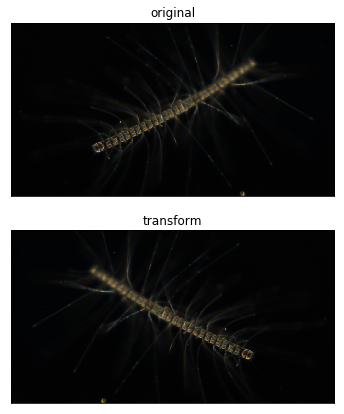

In [8]:
# A random flip transformation
rand_flip = transforms.Compose([
    transforms.RandomHorizontalFlip()
    ])

# load the image
ptf = glob.glob(os.path.join(os.getcwd(), 'SPC*'))

# we will load images with Python Image Library (PIL). 
img_orig = Image.open(ptf[0])

# do the flip
test = rand_flip(img_orig)

# display it
plot_transform_imgs(img_orig, test)

Did the image show up upside down? Try running the block again. RandomHoizontalFlip will only flip an image with a probability of 0.5.

The same is true of the RandomVerticalFlip function.

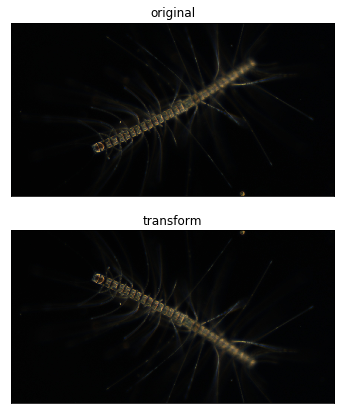

In [9]:
# redefine the random flip composer
rand_flip = transforms.Compose([
    transforms.RandomVerticalFlip()
])

# do the flip
test = rand_flip(img_orig)

# display i
plot_transform_imgs(img_orig, test)

The transformations can be chained together. The probability of a flip is independent in each step.

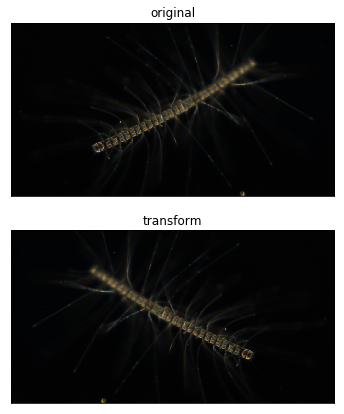

In [11]:
# redefine the random flip composer
rand_flip = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip()
])

# do the flip
test = rand_flip(img_orig)

# display it
plot_transform_imgs(img_orig, test)

Pytorch has a [RandomAffine](https://pytorch.org/docs/0.4.0/torchvision/transforms.html#torchvision.transforms.RandomAffine) module that encompasses many affine transformations:

    * rotation
    * translations
    * scaling
    * shearing
    
To see how they work, we will go through one-by-one starting with rotation, the first arguement in the RandomAffine transform.

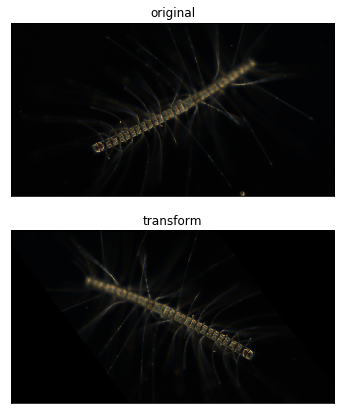

In [12]:
# define a random rotation 
rand_affine = transforms.Compose([
    transforms.RandomAffine((0, 360))  # (min_angle, max_angle)
])

# do the flip
test = rand_affine(img_orig)

# display it
plot_transform_imgs(img_orig, test)